In [1]:
import os
os.listdir("/kaggle/input")


['hmp-microbiome-features', 'mental-health-and-lifestyle-habits-2019-2024']

In [2]:
import pandas as pd
import os

folder = "/kaggle/input/mental-health-and-lifestyle-habits-2019-2024"
files = os.listdir(folder)
files

['Mental_Health_Lifestyle_Dataset.csv']

In [3]:
import pandas as pd

path = "/kaggle/input/mental-health-and-lifestyle-habits-2019-2024/Mental_Health_Lifestyle_Dataset.csv"
mh_df = pd.read_csv(path)

mh_df.head()
mh_df.shape
mh_df.columns
mh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      3000 non-null   object 
 1   Age                          3000 non-null   int64  
 2   Gender                       3000 non-null   object 
 3   Exercise Level               3000 non-null   object 
 4   Diet Type                    3000 non-null   object 
 5   Sleep Hours                  3000 non-null   float64
 6   Stress Level                 3000 non-null   object 
 7   Mental Health Condition      2405 non-null   object 
 8   Work Hours per Week          3000 non-null   int64  
 9   Screen Time per Day (Hours)  3000 non-null   float64
 10  Social Interaction Score     3000 non-null   float64
 11  Happiness Score              3000 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 281.4+ KB


In [4]:
mh_clean = mh_df.copy()

mh_clean = mh_clean.drop(columns=["Country"])
mh_clean.head()

,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,48,Male,Low,Vegetarian,6.3,Low,NaN,21,4.0,7.8,6.5
1,31,Male,Moderate,Vegan,4.9,Low,PTSD,48,5.2,8.2,6.8
2,37,Female,Low,Vegetarian,7.2,High,NaN,43,4.7,9.6,9.7
3,35,Male,Low,Vegan,7.2,Low,Depression,43,2.2,8.2,6.6
4,46,Male,Low,Balanced,7.3,Low,Anxiety,35,3.6,4.7,4.4


In [5]:
mh_clean.isna().sum()

Age                              0
Gender                           0
Exercise Level                   0
Diet Type                        0
Sleep Hours                      0
Stress Level                     0
Mental Health Condition        595
Work Hours per Week              0
Screen Time per Day (Hours)      0
Social Interaction Score         0
Happiness Score                  0
dtype: int64

In [6]:
mh_clean["Mental Health Condition"] = mh_clean["Mental Health Condition"].fillna("Unknown")

In [7]:
from sklearn.preprocessing import LabelEncoder

mh_encoded = mh_clean.copy()

cat_cols = mh_encoded.select_dtypes(include="object").columns

for col in cat_cols:
    le = LabelEncoder()
    mh_encoded[col] = le.fit_transform(mh_encoded[col])
    
mh_encoded.head()

,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,48,1,1,4,6.3,1,4,21,4.0,7.8,6.5
1,31,1,2,3,4.9,1,3,48,5.2,8.2,6.8
2,37,0,1,4,7.2,0,4,43,4.7,9.6,9.7
3,35,1,1,3,7.2,1,2,43,2.2,8.2,6.6
4,46,1,1,0,7.3,1,0,35,3.6,4.7,4.4


In [8]:
mh_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          3000 non-null   int64  
 1   Gender                       3000 non-null   int64  
 2   Exercise Level               3000 non-null   int64  
 3   Diet Type                    3000 non-null   int64  
 4   Sleep Hours                  3000 non-null   float64
 5   Stress Level                 3000 non-null   int64  
 6   Mental Health Condition      3000 non-null   int64  
 7   Work Hours per Week          3000 non-null   int64  
 8   Screen Time per Day (Hours)  3000 non-null   float64
 9   Social Interaction Score     3000 non-null   float64
 10  Happiness Score              3000 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 257.9 KB


In [9]:
X_life = mh_encoded.drop(columns=["Happiness Score"])
y_life = mh_encoded["Happiness Score"]

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_life_scaled = scaler.fit_transform(X_life)

import numpy as np
X_life_scaled = pd.DataFrame(X_life_scaled, columns=X_life.columns)

X_life_scaled.head()

,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score
0,0.504264,0.011375,-0.011939,1.436220,-0.117319,0.004909,1.407358,-1.612844,-0.623853,0.908976
1,-0.761919,0.011375,1.223125,0.733339,-1.050891,0.004909,0.705434,0.745328,0.063063,1.065037
2,-0.315031,-1.207371,-0.011939,1.436220,0.482835,-1.222308,1.407358,0.308629,-0.223152,1.611249
3,-0.463994,0.011375,-0.011939,0.733339,0.482835,0.004909,0.003510,0.308629,-1.654226,1.065037
4,0.355301,0.011375,-0.011939,-1.375303,0.549519,0.004909,-1.400339,-0.390088,-0.852824,-0.300495


In [11]:
X_life_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,1.184238e-18,1.000167,-1.730177,-0.836401,-0.017106,0.876670,1.695965
Gender,3000.0,-7.105427e-17,1.000167,-1.207371,-1.207371,0.011375,1.230120,1.230120
Exercise Level,3000.0,-4.973799e-17,1.000167,-1.247003,-1.247003,-0.011939,1.223125,1.223125
Diet Type,3000.0,-1.065814e-16,1.000167,-1.375303,-0.672423,0.030458,0.733339,1.436220
Sleep Hours,3000.0,2.948752e-16,1.000167,-3.384823,-0.650789,0.016049,0.682886,3.216868
Stress Level,3000.0,-6.513308e-18,1.000167,-1.222308,-1.222308,0.004909,1.232125,1.232125
Mental Health Condition,3000.0,-1.000681e-16,1.000167,-1.400339,-0.698415,0.003510,0.705434,1.407358
Work Hours per Week,3000.0,1.681618e-16,1.000167,-1.700183,-0.826786,-0.040729,0.920007,1.706064
Screen Time per Day (Hours),3000.0,2.025047e-16,1.000167,-1.768712,-0.852824,0.005820,0.864464,1.665865
Social Interaction Score,3000.0,2.623087e-16,1.000167,-1.744057,-0.846708,0.011627,0.830945,1.767310


In [12]:
import pandas as pd

hmp_path = "/kaggle/input/hmp-microbiome-features/hmp_microbiome_features.csv"
hmp = pd.read_csv(hmp_path)

hmp.head()
hmp.shape

(2915, 14)

In [13]:
min_len = min(len(mh_encoded), len(hmp))

mh_sampled = mh_encoded.sample(min_len, random_state=42).reset_index(drop=True)
hmp_sampled = hmp.sample(min_len, random_state=42).reset_index(drop=True)
combined_df = pd.concat([mh_sampled, hmp_sampled], axis=1)
combined_df.shape
combined_df.head()


,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,...,Project Status,Current Finishing Level,Gene Count,Sequencing Center,Funding Source,PC1,PC2,Cluster,diet_score,mood_score
0,51,1,2,1,5.9,1,2,36,6.4,7.1,...,In Progress,Unknown,0,J. Craig Venter Institute,NIH-HMP,-1.286412,1.875877,3,4,2.7
1,25,0,0,2,5.8,1,3,52,6.3,1.2,...,In Progress,Unknown,0,Washington University Genome Sequencing Center,NIH-HMP Sequencing Center,-1.497818,-0.521621,1,2,0.3
2,53,1,1,0,6.3,0,2,54,4.6,2.0,...,In Progress,Unknown,0,Washington University Genome Sequencing Center,NIH-HMP Sequencing Center,-1.468658,-0.505415,1,9,5.0
3,20,0,1,0,7.1,1,3,37,2.5,4.2,...,In Progress,Unknown,0,J. Craig Venter Institute,NIH-HMP,-1.153435,1.415021,3,2,0.8
4,60,0,2,0,4.7,0,4,22,6.8,8.7,...,In Progress,Unknown,0,Washington University Genome Sequencing Center,NIH-HMP Sequencing Center,-1.486283,-0.486888,1,2,0.6


In [14]:
drop_cols = [
    "Organism Name", "Domain", "NCBI Superkingdom",
    "HMP Isolation Body Site", "Project Status",
    "Current Finishing Level", "Sequencing Center",
    "Funding Source"
]

combined_df = combined_df.drop(columns=drop_cols)
combined_df.head()

,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Gene Count,PC1,PC2,Cluster,diet_score,mood_score
0,51,1,2,1,5.9,1,2,36,6.4,7.1,5.6,0,-1.286412,1.875877,3,4,2.7
1,25,0,0,2,5.8,1,3,52,6.3,1.2,9.8,0,-1.497818,-0.521621,1,2,0.3
2,53,1,1,0,6.3,0,2,54,4.6,2.0,6.0,0,-1.468658,-0.505415,1,9,5.0
3,20,0,1,0,7.1,1,3,37,2.5,4.2,8.6,0,-1.153435,1.415021,3,2,0.8
4,60,0,2,0,4.7,0,4,22,6.8,8.7,2.8,0,-1.486283,-0.486888,1,2,0.6


In [15]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# 1) Define column groups
lifestyle_cols = [
    "Age", "Gender", "Exercise Level", "Diet Type",
    "Sleep Hours", "Stress Level", "Mental Health Condition",
    "Work Hours per Week", "Screen Time per Day (Hours)",
    "Social Interaction Score"
]

micro_cols = [
    "Gene Count", "PC1", "PC2", "Cluster",
    "diet_score", "mood_score"
]

target_col = "Stress Level"

# 2) Extract matrices
X_life = combined_df[lifestyle_cols]
X_micro = combined_df[micro_cols]
y = combined_df[target_col]


In [16]:
# Scale lifestyle features
scaler_life = StandardScaler()
X_life_scaled = scaler_life.fit_transform(X_life)
X_life_scaled = pd.DataFrame(X_life_scaled, columns=lifestyle_cols)

# Scale microbiome features
scaler_micro = StandardScaler()
X_micro_scaled = scaler_micro.fit_transform(X_micro)
X_micro_scaled = pd.DataFrame(X_micro_scaled, columns=micro_cols)

# Combine for full multimodal model
X_full = pd.concat([X_life_scaled, X_micro_scaled], axis=1)


In [17]:
# Use indices for a consistent split across all feature sets
indices = np.arange(len(y))
train_idx, test_idx = train_test_split(indices, test_size=0.2, random_state=42)

X_train_l = X_life_scaled.iloc[train_idx]
X_test_l  = X_life_scaled.iloc[test_idx]

X_train_m = X_micro_scaled.iloc[train_idx]
X_test_m  = X_micro_scaled.iloc[test_idx]

X_train_f = X_full.iloc[train_idx]
X_test_f  = X_full.iloc[test_idx]

y_train = y.iloc[train_idx]
y_test  = y.iloc[test_idx]


In [18]:
#lifestyle only model
model_life = RandomForestRegressor(n_estimators=300, random_state=42)
model_life.fit(X_train_l, y_train)
pred_l = model_life.predict(X_test_l)

r2_l = r2_score(y_test, pred_l)
rmse_l = np.sqrt(mean_squared_error(y_test, pred_l))

print("Lifestyle-only R²:", r2_l)
print("Lifestyle-only RMSE:", rmse_l)

Lifestyle-only R²: 1.0
Lifestyle-only RMSE: 0.0


In [19]:
#microbiome only model
model_micro = RandomForestRegressor(n_estimators=300, random_state=42)
model_micro.fit(X_train_m, y_train)
pred_m = model_micro.predict(X_test_m)

r2_m = r2_score(y_test, pred_m)
rmse_m = np.sqrt(mean_squared_error(y_test, pred_m))

print("Microbiome-only R²:", r2_m)
print("Microbiome-only RMSE:", rmse_m)


Microbiome-only R²: -0.18505274292475415
Microbiome-only RMSE: 0.8773805808413547


In [20]:
model_full = RandomForestRegressor(n_estimators=300, random_state=42)
model_full.fit(X_train_f, y_train)
pred_f = model_full.predict(X_test_f)

r2_f = r2_score(y_test, pred_f)
rmse_f = np.sqrt(mean_squared_error(y_test, pred_f))

print("Full multimodal R²:", r2_f)
print("Full multimodal RMSE:", rmse_f)


Full multimodal R²: 1.0
Full multimodal RMSE: 0.0


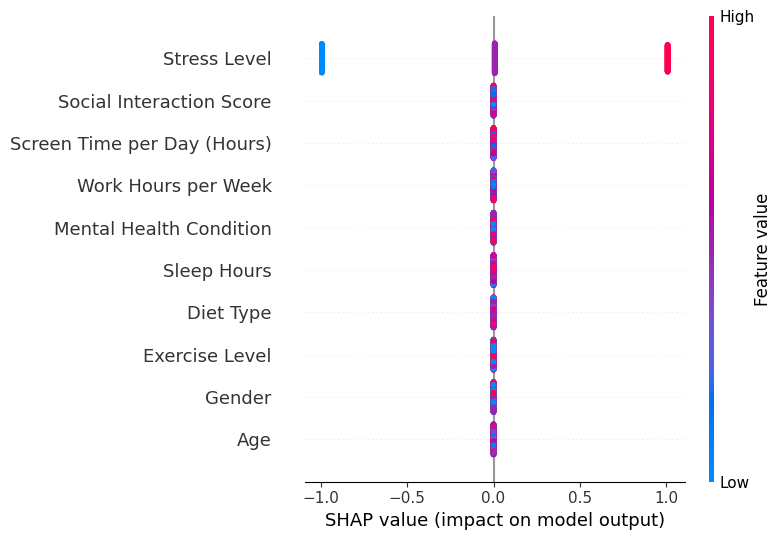

In [21]:
import shap

explainer = shap.TreeExplainer(model_life)
shap_values = explainer.shap_values(X_test_l)

shap.summary_plot(shap_values, X_test_l)